/* =====================================================================================

CSPlib version 1.1.0
Copyright (2021) NTESS
https://github.com/sandialabs/csplib

Copyright 2021 National Technology & Engineering Solutions of Sandia, LLC (NTESS).
Under the terms of Contract DE-NA0003525 with NTESS, the U.S. Government retains
certain rights in this software.

This file is part of CSPlib. CSPlib is open-source software: you can redistribute it
and/or modify it under the terms of BSD 2-Clause License
(https://opensource.org/licenses/BSD-2-Clause). A copy of the license is also
provided under the main directory

Questions? Contact Habib Najm at <hnnajm@sandia.gov>, or
           Kyungjoo Kim at <kyukim@sandia.gov>, or
           Oscar Diaz-Ibarra at <odiazib@sandia.gov>

Sandia National Laboratories, Livermore, CA, USA

===================================================================================== */

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd() 

'/Users/odiazib/csp_clang_bld_develop/csp/install/release/example/runs/Davis_Skodje'

In [2]:
firstname=''
state = np.loadtxt( firstname +'_state.dat')
m     = np.loadtxt( firstname +'_m.dat')
tau   = np.loadtxt( firstname +'_tau.dat')
f     = np.loadtxt( firstname + '_magMode.dat')
rank  =  np.loadtxt( firstname +'_jac_numerical_rank.dat')
t     = np.loadtxt( firstname + '_time.dat')
Pointers = np.loadtxt(firstname +'_cspPointers.dat')

Text(0, 0.5, 'z')

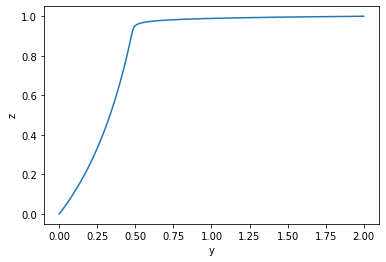

In [3]:
plt.figure()
plt.plot(state[:,0],state[:,1] )
plt.xlabel('y')
plt.ylabel('z')

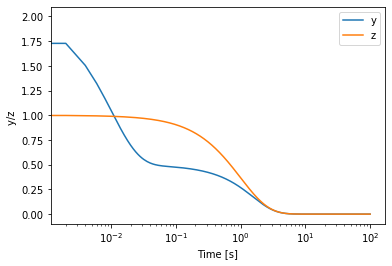

In [4]:
plt.figure()
plt.plot(t,state[:,0] ,label='y')
plt.plot(t,state[:,1] ,label='z')
plt.xlabel('Time [s]')
plt.ylabel('y/z ')
plt.legend(loc='best')
plt.xscale('log')

In [5]:
def makePlot(var, var_label='M'):
    fig, ax1 = plt.subplots() 
         
    color = 'black'
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('y /z ', color=color) 
    ax1.plot(t, state[:,0], color='r', label='y')
    ax1.plot(t, state[:,1], color='g', label='z')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(var_label,color=color)  # we already handled the x-label with ax1
    ax2.plot(t, var,'.',  color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.xscale('log')
    ax1.legend(loc=2)
    return 

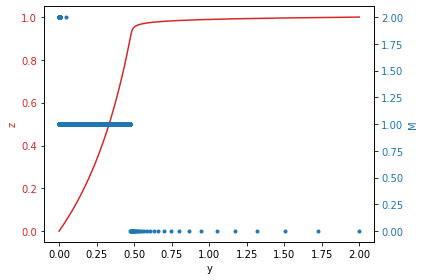

In [6]:
fig, ax1 = plt.subplots() #figsize=(8,4)
         
color = 'tab:red'
ax1.set_xlabel('y')
ax1.set_ylabel('z', color=color) 
ax1.plot(state[:,0],state[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('M',color=color)  # we already handled the x-label with ax1
ax2.plot(state[:,0], m,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

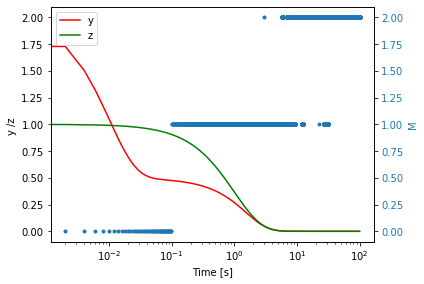

In [7]:
makePlot(m, var_label='M')
plt.savefig('M.pdf')

In [8]:
Nvar = len(tau[0,:])
tmp = []
tmrank = []
for i,M in enumerate(m):
    if M == Nvar:
        Mi = M -1 
    else:
        Mi = M
    tmp += [tau[i,int(Mi)]] 
    if rank[i] == Nvar:
        tmrank += [tau[i,Nvar-1]]
    else:    
        tmrank += [tau[i,int(rank[i])]]

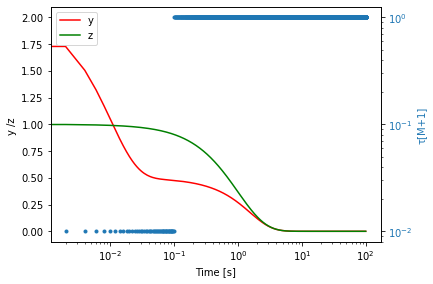

In [9]:
makePlot(tmp, var_label='τ[M+1]')
plt.yscale('log')
plt.savefig('tau.pdf')

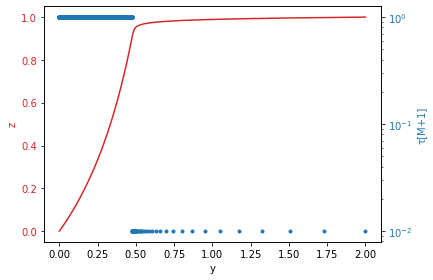

In [10]:
fig, ax1 = plt.subplots() #figsize=(8,4)
         
color = 'tab:red'
ax1.set_xlabel('y')
ax1.set_ylabel('z', color=color) 
ax1.plot(state[:,0],state[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('τ[M+1]',color=color)  # we already handled the x-label with ax1
ax2.plot(state[:,0], tmp,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.yscale('log')


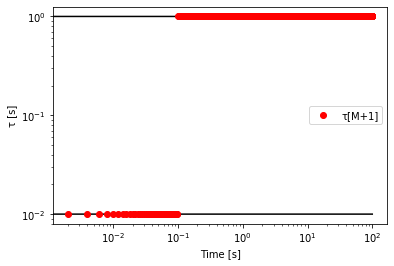

In [11]:
plt.figure()
plt.plot(t,tau, 'k')
plt.plot(t,tmp,'ro', label='τ[M+1]')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('τ [s]')
plt.legend(loc='best')
plt.savefig('timescales.pdf')

Text(0, 0.5, 'τ [s]')

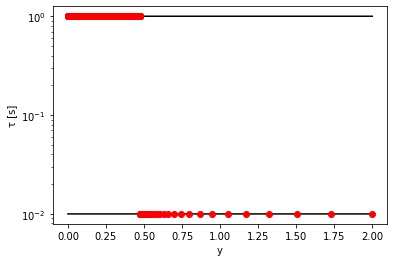

In [12]:
plt.figure()
plt.plot(state[:,0],tau, 'k', label='τ')
plt.plot(state[:,0],tmp,'ro', label='τ[M+1]')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('y')
plt.ylabel('τ [s]')

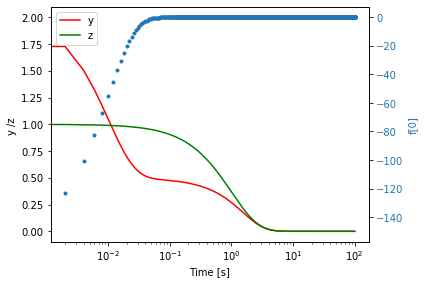

In [13]:
makePlot(f[:,0], var_label='f[0]')
plt.savefig('f0.pdf')

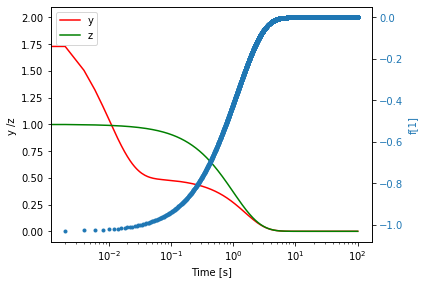

In [14]:
makePlot(f[:,1], var_label='f[1]')
plt.savefig('f1.pdf')

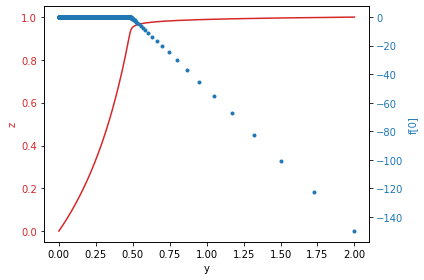

In [15]:
fig, ax1 = plt.subplots() #figsize=(8,4)
         
color = 'tab:red'
ax1.set_xlabel('y')
ax1.set_ylabel('z', color=color) 
ax1.plot(state[:,0],state[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('f[0]',color=color)  # we already handled the x-label with ax1
ax2.plot(state[:,0], f[:,0],'.',  color=color)
# ax2.plot(state[:,0], f[:,1],'.',  color='g')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

# plt.yscale('log')

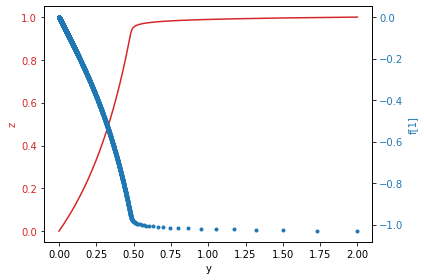

In [16]:
fig, ax1 = plt.subplots() #figsize=(8,4)
         
color = 'tab:red'
ax1.set_xlabel('y')
ax1.set_ylabel('z', color=color) 
ax1.plot(state[:,0],state[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('f[1]',color=color)  # we already handled the x-label with ax1
ax2.plot(state[:,0], f[:,1],'.',  color=color)
# ax2.plot(state[:,0], f[:,1],'.',  color='g')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()


Text(0, 0.5, 'f1')

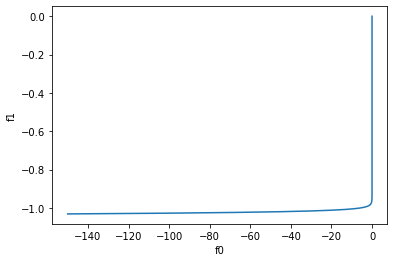

In [17]:
plt.figure()
plt.plot(f[:,0],f[:,1] )
plt.xlabel('f0')
plt.ylabel('f1')
# plt.xscale('log')

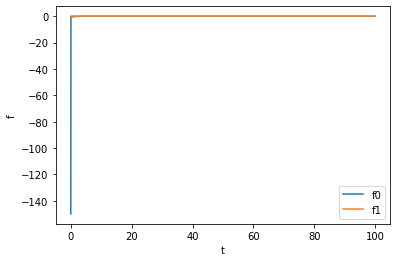

In [18]:
plt.figure()
plt.plot(t,f[:,0], label='f0' )
plt.plot(t,f[:,1], label='f1' )
plt.xlabel('t')
plt.ylabel('f')
plt.legend(loc='best')
# plt.yscale('log')

In [20]:
Npoints = len(t)
Ptrs = np.reshape(Pointers,[Npoints,Nvar,Nvar])

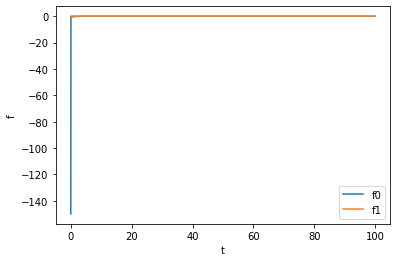

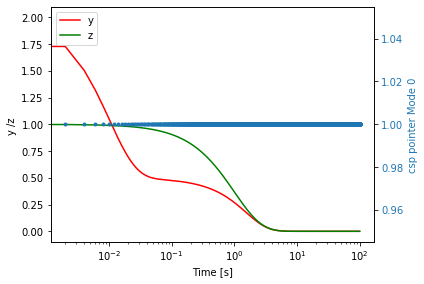

In [28]:
makePlot(Ptrs[:,0,0], var_label='csp pointer Mode 0')

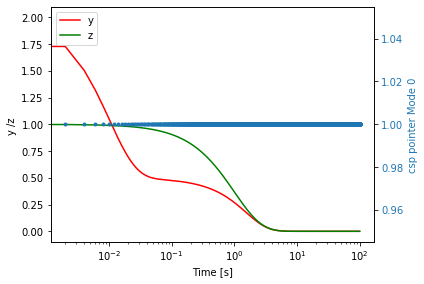

In [30]:
makePlot(Ptrs[:,1,1], var_label='csp pointer Mode 0')